In [249]:
import graph.generate_graph 
import task_allocation_layer.task_allocation 
import numpy as np
import time

In [250]:
import imp
imp.reload(graph.generate_graph )
imp.reload(task_allocation_layer.task_allocation)

<module 'task_allocation_layer.task_allocation' from '/Users/luzy6/PycharmProjects/UAV_mission_assignment_and_path_planning/task_allocation_layer/task_allocation.py'>

In [251]:
#parameters
N_depots = 3
N_drones = 10
N_packages = 40
N_transit_edges = 20

In [252]:
# get a graph that randomly generate depot nodes, transit nodes and package nodes and cost_matrix
TG, depots_node, transit_node, packages_node, transit_edges, cost_matrix = graph.generate_graph.return_Digraph(N_depots, N_transit_edges, N_packages)

In [253]:
#update other parameters
total_nodes = len(TG.nodes)
N_transits = len(transit_node)

# we get transit node, package node and depot node, now we store the rest nodes are normal node
normal_node = np.array([])
for i in range(len(TG.nodes())):
    if i not in depots_node and i not in transit_node and i not in packages_node:
        normal_node = np.append(normal_node, i)

In [254]:
print(depots_node)
print(packages_node)
print(transit_node)
print(normal_node)

[107. 154. 161.]
[  3.  19.  20.  24.  26.  35.  50.  51.  68.  73.  74.  75.  81.  82.
  86. 100. 104. 111. 127. 131. 134. 137. 145. 146. 148. 153. 159. 166.
 168. 171. 175. 180. 182. 188. 189. 190. 194. 196. 210. 211.]
[  0.   6.  11.  12.  16.  18.  22.  23.  31.  32.  33.  34.  36.  37.
  43.  44.  48.  49.  57.  58.  65.  69.  90.  93.  95.  96. 101. 110.
 125. 172. 174. 184. 197. 198. 201. 202.]
[  1.   2.   4.   5.   7.   8.   9.  10.  13.  14.  15.  17.  21.  25.
  27.  28.  29.  30.  38.  39.  40.  41.  42.  45.  46.  47.  52.  53.
  54.  55.  56.  59.  60.  61.  62.  63.  64.  66.  67.  70.  71.  72.
  76.  77.  78.  79.  80.  83.  84.  85.  87.  88.  89.  91.  92.  94.
  97.  98.  99. 102. 103. 105. 106. 108. 109. 112. 113. 114. 115. 116.
 117. 118. 119. 120. 121. 122. 123. 124. 126. 128. 129. 130. 132. 133.
 135. 136. 138. 139. 140. 141. 142. 143. 144. 147. 149. 150. 151. 152.
 155. 156. 157. 158. 160. 162. 163. 164. 165. 167. 169. 170. 173. 176.
 177. 178. 179. 181. 183. 1

In [255]:
start_time = time.time()
drone_tours = task_allocation_layer.task_allocation.task_allocation(total_nodes, N_depots, N_packages, N_drones, cost_matrix, depots_node, transit_node, packages_node, normal_node)
end_time = time.time()
print('Took %f second' % (end_time - start_time))

task allocation done
Took 0.089232 second


/Users/luzy6/PycharmProjects/UAV_mission_assignment_and_path_planning/task_allocation_layer/task_allocation.py:133: OptimizeWarning: Sparse constraint matrix detected; setting 'sparse':True.
  res = linprog(c=cost_vector, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq,
/Users/luzy6/miniforge3/envs/UAV/lib/python3.9/site-packages/scipy/optimize/_linprog_util.py:843: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  warn(redundancy_warning, OptimizeWarning, stacklevel=1)


In [256]:
import networkx as nx

In [257]:
from math import radians, cos, sin, asin, sqrt
 
def haversine(lon1, lat1, lon2, lat2): # 经度1，纬度1，经度2，纬度2 （十进制度数）
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # 将十进制度数转化为弧度
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
 
    # haversine公式
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # 地球平均半径，单位为公里
    return c * r * 1000

In [258]:
def dist(a, b, TG=TG):
    lat1 = TG.nodes[a]['lat']
    lon1 = TG.nodes[a]['lon']
    lat2 = TG.nodes[b]['lat']
    lon2 = TG.nodes[b]['lon']
#     print("node",a,lon1,lat1,"to node",b,lon2,lat2," liner distance:",haversine(lon1, lat1, lon2, lat2))
#     print(haversine(lon1, lat1, lon2, lat2))
#     print(lat1, lon1, lat2, lon2)
    return haversine(lon1, lat1, lon2, lat2)

In [259]:
# find each drones route
drone_routes = []
for i in range(len(drone_tours)):
    print(i)
    cur_route = [drone_tours[i][0]]
#     print("drone", i, "route:")
    for (node1, node2) in zip(drone_tours[i][:len(drone_tours[i])-1], drone_tours[i][1:]):
        cur_route.extend(nx.astar_path(TG, node1, node2, dist)[1:])
#         print(nx.astar_path(TG, node1, node2, dist))
    drone_routes.append(cur_route)

0
1
2
3
4
5
6
7
8


In [260]:
pos_location = {}
for i in TG.nodes:
    pos_location[i] = (TG.nodes[i]['lon'], TG.nodes[i]['lat'])
    

In [261]:
node_size = 1000
colo_map = {}
nod_size_map = {}
for i in transit_node:
    colo_map[i] = 'green'
    nod_size_map[i] = node_size
for i in packages_node:
    colo_map[i] = 'red'
    nod_size_map[i] = node_size
for i in depots_node:
    colo_map[i] = 'black'
    nod_size_map[i] = node_size
for i in normal_node:
    colo_map[i] = 'grey'
    nod_size_map[i] = 0
len(colo_map)
color_map = []
node_size_map = []
for i in range(len(colo_map)):
    color_map.append(colo_map[i])
    node_size_map.append(nod_size_map[i])

In [262]:
pos = nx.random_layout(TG)

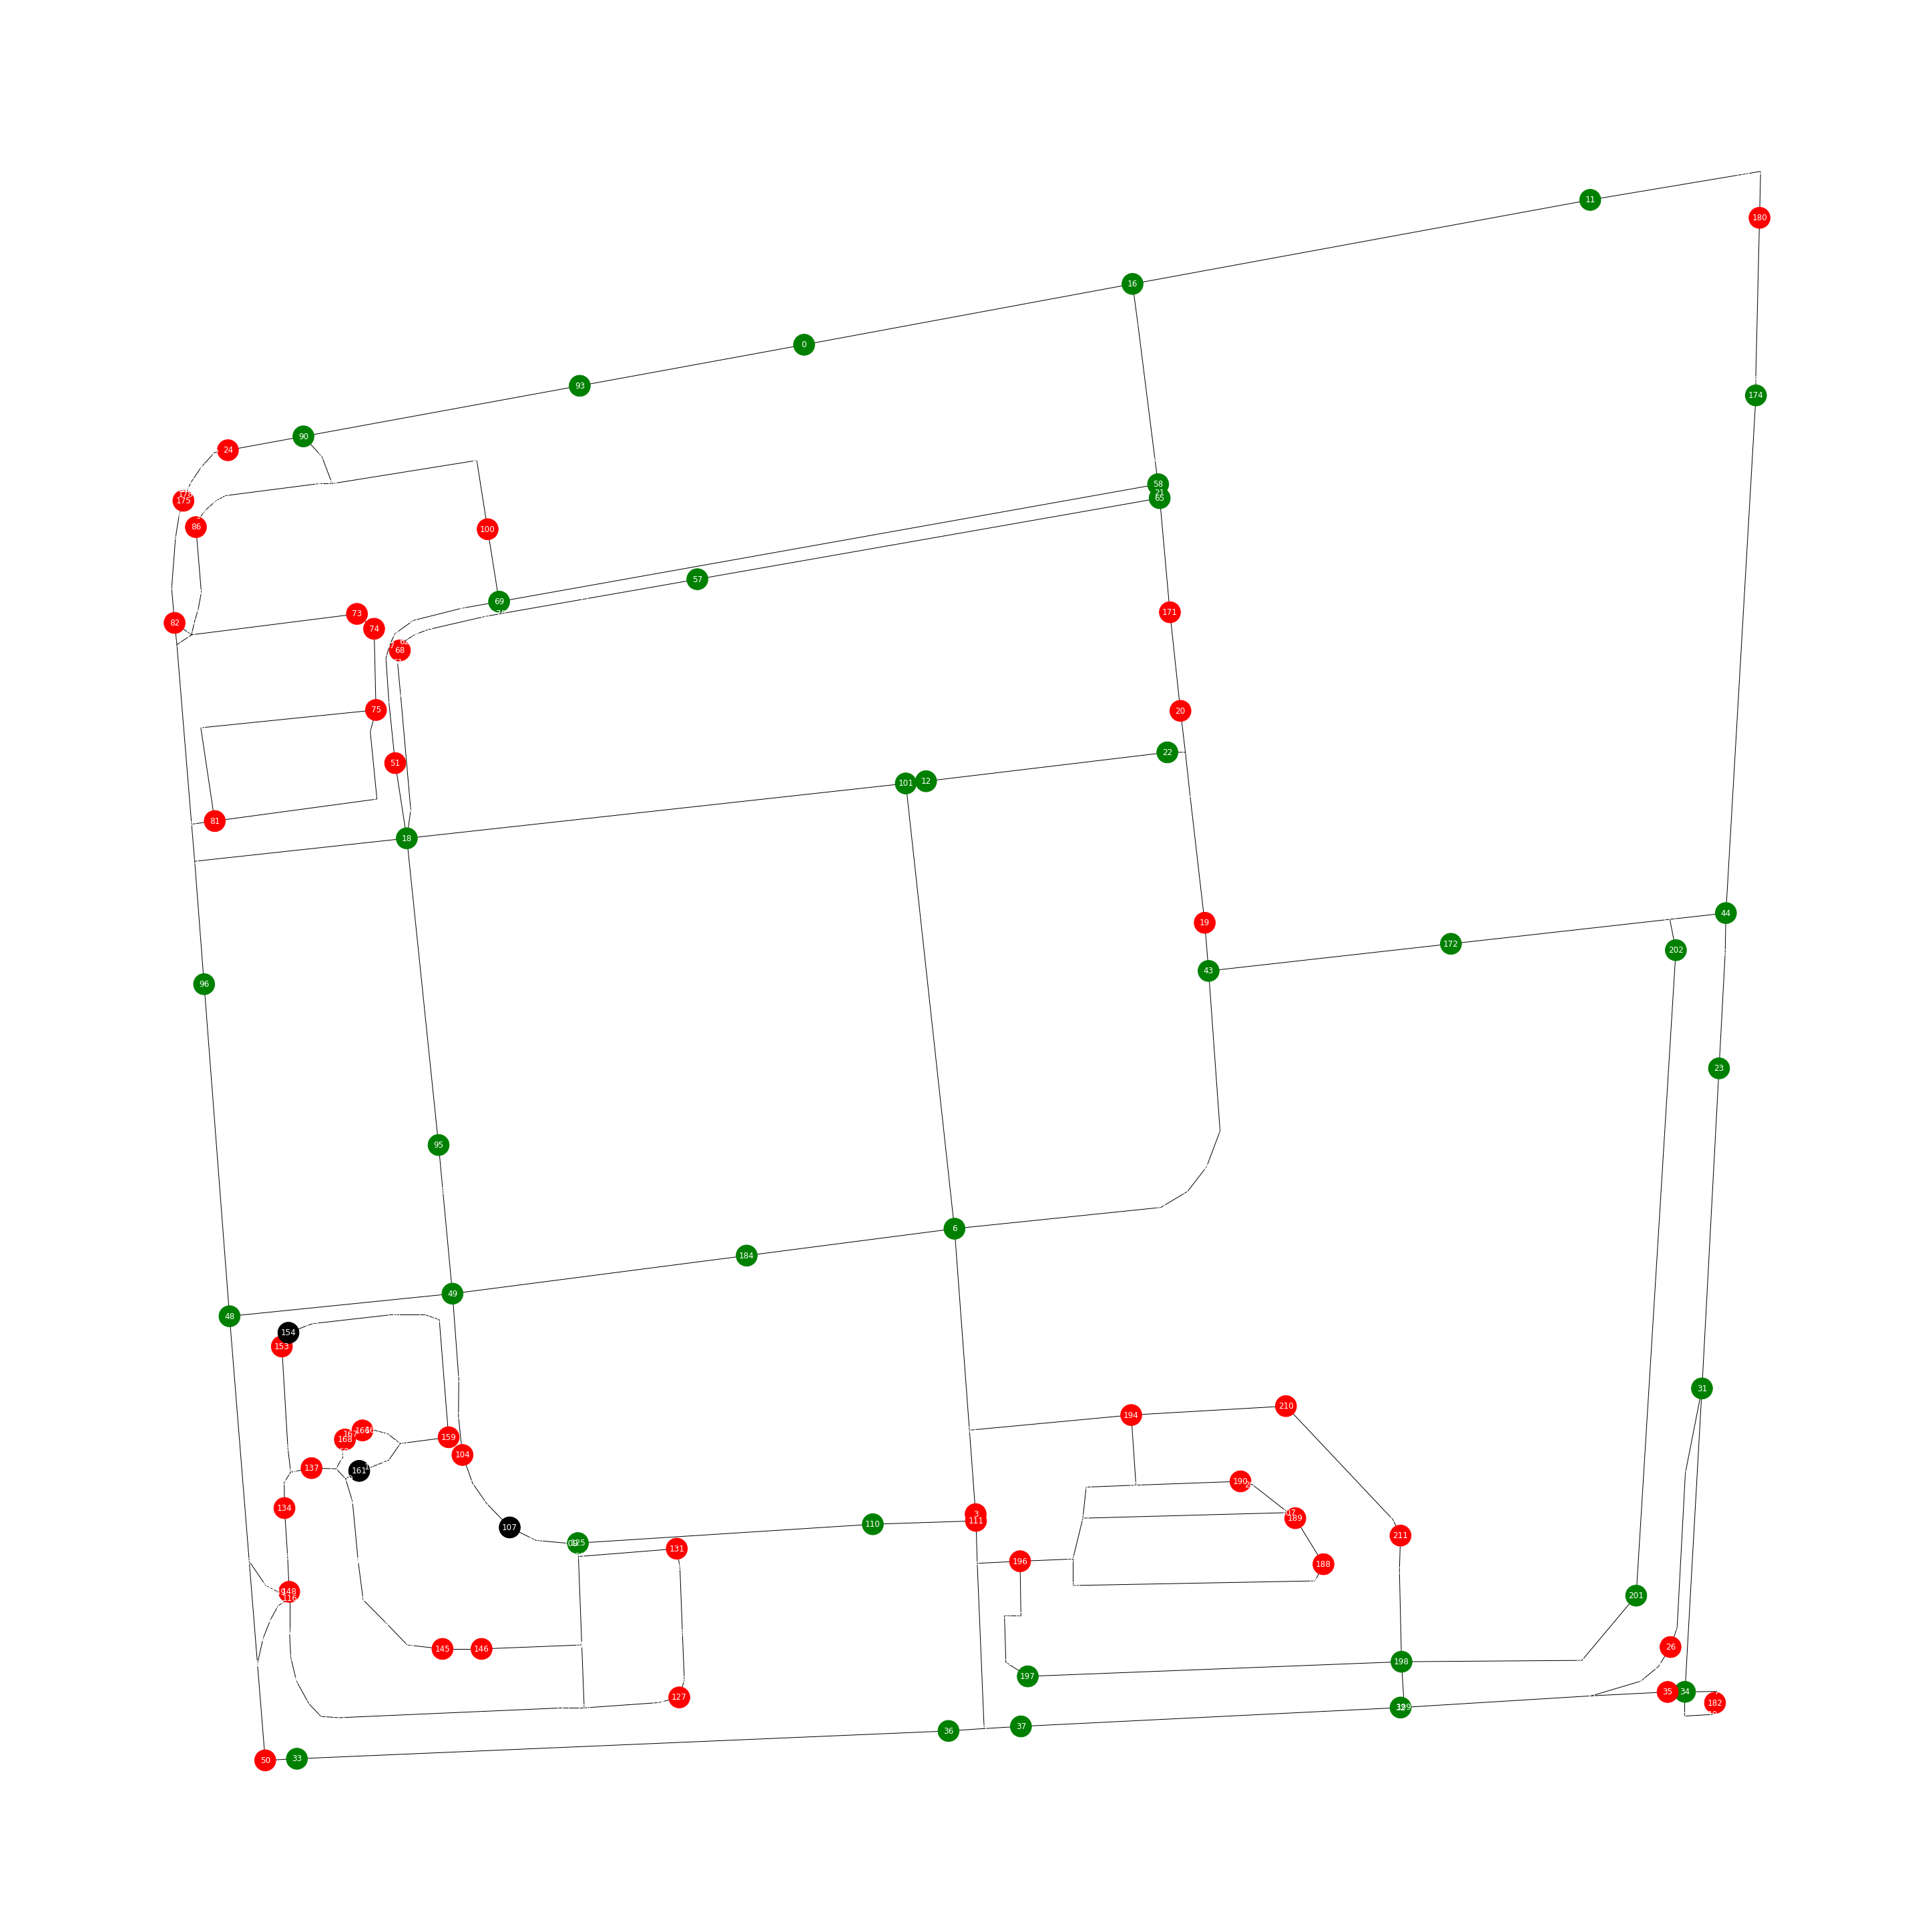

In [263]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (40, 40)  # 单位是inches
#green transit_node
#black depot_node
#red package node
#grey normal_node
nx.draw(TG, 
        pos=pos_location, 
        node_size=node_size_map, 
        cmap=plt.get_cmap('viridis'), 
        node_color=color_map, 
        width=1,
        with_labels=True, 
        font_color='white')

In [264]:
# [183, 90.0, 93.0, 0.0, 16.0, 11.0, 174.0, 44.0, 202.0, 201.0, 25]

In [265]:
# # each drone total delivery cost
# delivery_cost = []
# for i in range(len(drone_routes)):
#     this_cost = 0
#     for j in range(0,len(drone_routes[i])-1):
#         # transit edge dose not consume the distance flown by the drone
#         if TG.nodes[drone_routes[i][j]]['type'] == 'transit' and TG.nodes[drone_routes[i][j+1]]['type'] == 'transit':
#             continue
#         this_cost += TG.edges[drone_routes[i][j], drone_routes[i][j+1]]['weight']
#     delivery_cost.append(this_cost)
# print(delivery_cost)

In [266]:
# # we generate a new type graph
# transit_network = nx.Graph()
# # firstly, add transit nodes
# for i in transit_node:
# #     print(i)
#     transit_network.add_node(i
#                             , lon=TG.nodes[i]['lon']
#                             , lat=TG.nodes[i]['lat']
#                             , type='transit'
#                             )
# # then we add transit edges
# for edge in transit_edges:
#     transit_network.add_edge(edge[0], edge[1]
#                              ,type='transit'
#                              ,weight=0.0
#                              )
#     for t in transit_node: #transit to transtit (not a pair of transit node)
#         if (edge[0], t) not in transit_network.edges:
#             transit_network.add_edge(edge[0], t
#                              ,type='flight'
#                              ,weight=haversine(TG.nodes[edge[0]]['lon'], TG.nodes[edge[0]]['lat'], TG.nodes[t]['lon'], TG.nodes[t]['lat'])
#                              )
#         if (edge[1], t) not in transit_network.edges:
#             transit_network.add_edge(edge[1], t
#                              ,type='flight'
#                              ,weight=haversine(TG.nodes[edge[0]]['lon'], TG.nodes[edge[1]]['lat'], TG.nodes[t]['lon'], TG.nodes[t]['lat'])
#                              )
            
# print(len(transit_network.edges))


# # we add depots and packages
# for i in packages_node:
#     transit_network.add_node(i
#                              , lon=TG.nodes[i]['lon']
#                              , lat=TG.nodes[i]['lat']
#                              , type='package'
#                             )
# for i in depots_node:
#     transit_network.add_node(i
#                              , lon=TG.nodes[i]['lon']
#                              , lat=TG.nodes[i]['lat']
#                              , type='depot'
#                             )
# # finally we add edge ?depot to depot?, depot to package and depot to transit and transit to package
# for i in depots_node:
#     for j in transit_node: # depot to transit
#         transit_network.add_edge(i, j
#                                  ,type='flight'
#                                  ,weight=haversine(TG.nodes[i]['lon'], TG.nodes[i]['lat'], TG.nodes[j]['lon'], TG.nodes[j]['lat'])# directly distance
#                                 )
# print(len(transit_network.edges))
# for t in transit_node:
#     for p in packages_node:
#         transit_network.add_edge(t, p
#                                  ,type='flight'
#                                  ,weight=haversine(TG.nodes[t]['lon'], TG.nodes[t]['lat'], TG.nodes[p]['lon'], TG.nodes[p]['lat'])# directly distance
#                                 )
# print(len(transit_network.edges))

In [267]:
depots_node

array([107., 154., 161.])

In [268]:
packages_node

array([  3.,  19.,  20.,  24.,  26.,  35.,  50.,  51.,  68.,  73.,  74.,
        75.,  81.,  82.,  86., 100., 104., 111., 127., 131., 134., 137.,
       145., 146., 148., 153., 159., 166., 168., 171., 175., 180., 182.,
       188., 189., 190., 194., 196., 210., 211.])

In [269]:
transit_node

array([  0.,   6.,  11.,  12.,  16.,  18.,  22.,  23.,  31.,  32.,  33.,
        34.,  36.,  37.,  43.,  44.,  48.,  49.,  57.,  58.,  65.,  69.,
        90.,  93.,  95.,  96., 101., 110., 125., 172., 174., 184., 197.,
       198., 201., 202.])

In [270]:
car_speed = 15.0
drone_speed = 20.0 
# we generate a new type graph
transit_network = nx.Graph()
# firstly, add transit nodes
depot_id = 154
package_id = 180 #25
for i in transit_node:
#     print(i)
    transit_network.add_node(i
                            , lon=TG.nodes[i]['lon']
                            , lat=TG.nodes[i]['lat']
                            , type='transit'
                            )
# then we add transit to another transit edges
for i in transit_node:
    for j in transit_node:
        if i != j:
            transit_network.add_edge(i, j
                                 ,type='flght'
                                 ,weight=haversine(TG.nodes[i]['lon'], TG.nodes[i]['lat'], TG.nodes[j]['lon'], TG.nodes[j]['lat'])
                                 ,time=haversine(TG.nodes[i]['lon'], TG.nodes[i]['lat'], TG.nodes[j]['lon'], TG.nodes[j]['lat'])/drone_speed
                                 )
# reset transit edges weight to 0
for edge in transit_edges:
    transit_network.edges[edge[0], edge[1]]['weight'] = 0.0
    transit_network.edges[edge[0], edge[1]]['type'] = 'transit'
    transit_network.edges[edge[0], edge[1]]['time'] = TG.edges[edge[0], edge[1]]['weight']/car_speed
    
    
    

            
print(len(transit_network.edges))


# we add depots and packages

transit_network.add_node(depot_id
                        , lon=TG.nodes[depot_id]['lon']
                        , lat=TG.nodes[depot_id]['lat']
                        , type='depot'
                        )

transit_network.add_node(package_id
                        , lon=TG.nodes[package_id]['lon']
                        , lat=TG.nodes[package_id]['lat']
                        , type='package'
                        )
transit_network.add_edge(depot_id, package_id
                        , type='flight'
                        , weight=haversine(TG.nodes[depot_id]['lon'], TG.nodes[depot_id]['lat'], TG.nodes[package_id]['lon'], TG.nodes[package_id]['lat'])
                        , time=haversine(TG.nodes[depot_id]['lon'], TG.nodes[depot_id]['lat'], TG.nodes[package_id]['lon'], TG.nodes[package_id]['lat'])/drone_speed
                        )

print(len(transit_network.edges))

# finally we add edge ?depot to depot?, depot to package and depot to transit and transit to package

for j in transit_node: # depot to transit
    transit_network.add_edge(depot_id, j
                             ,type='flight'
                             ,weight=haversine(TG.nodes[depot_id]['lon'], TG.nodes[depot_id]['lat'], TG.nodes[j]['lon'], TG.nodes[j]['lat'])# directly distance
                             ,time=haversine(TG.nodes[depot_id]['lon'], TG.nodes[depot_id]['lat'], TG.nodes[j]['lon'], TG.nodes[j]['lat'])/drone_speed
                            )
print(len(transit_network.edges))
for t in transit_node:
    transit_network.add_edge(t, package_id
                             ,type='flight'
                             ,weight=haversine(TG.nodes[t]['lon'], TG.nodes[t]['lat'], TG.nodes[package_id]['lon'], TG.nodes[package_id]['lat'])# directly distance
                             ,time=haversine(TG.nodes[t]['lon'], TG.nodes[t]['lat'], TG.nodes[package_id]['lon'], TG.nodes[package_id]['lat'])/drone_speed
                            )
print(len(transit_network.edges))

630
631
667
703


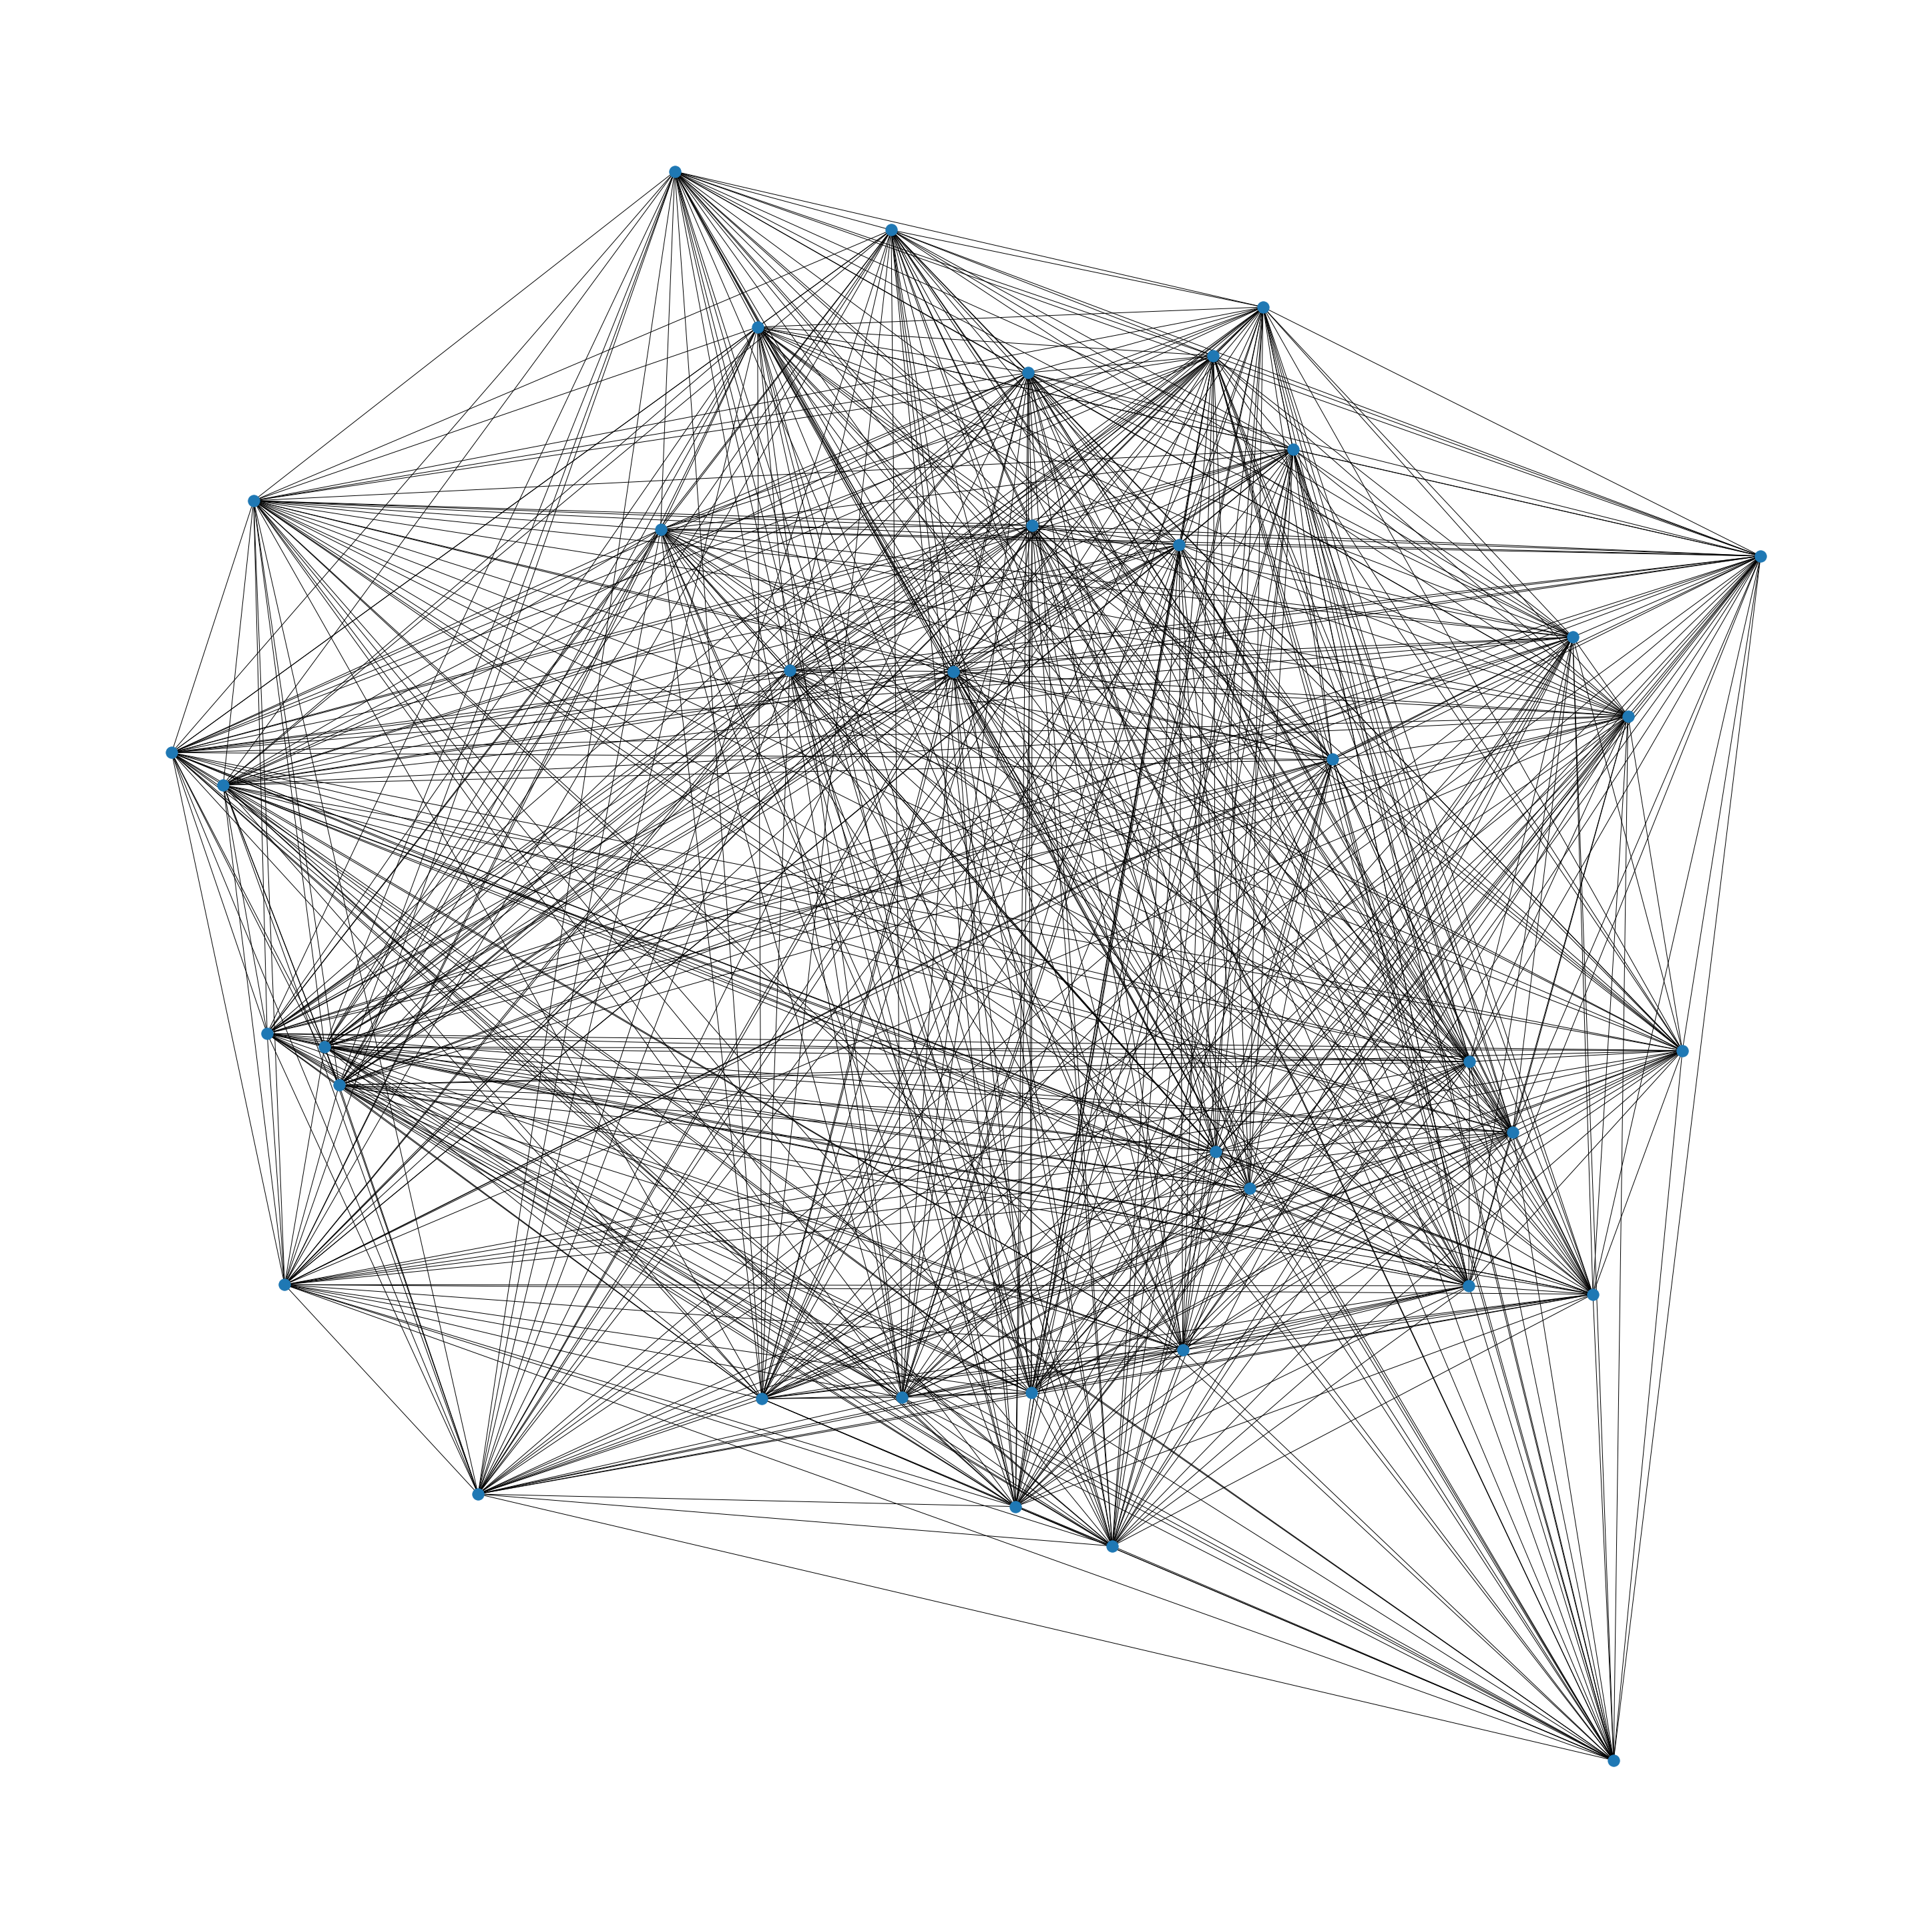

In [271]:
nx.draw(transit_network)

In [272]:
drone_routes[1][0:2]

[107.0, 108]

In [273]:
# for edge in transit_edges:
#     print(transit_network.edges[edge[0], edge[1]]['weight'])
#     print(transit_network.edges[edge[0], edge[1]]['type'])
                             

In [274]:
print(transit_edges)

[[58, 69], [33, 36], [201, 202], [18, 101], [44, 174], [57, 65], [11, 16], [6, 101], [32, 37], [197, 198], [0, 16], [48, 96], [23, 31], [18, 95], [49, 184], [110, 125], [31, 34], [90, 93], [43, 172], [12, 22]]


In [275]:
transit_network.edges[package_id, depot_id]['weight']

915.6433768645082

In [277]:
transit_network.edges[154, 180]['weight']

915.6433768645082

In [278]:
# transit_network.remove_edge(113, 179)

In [468]:
# from heapq import heappush, heappop
# from itertools import count
# import networkx as nx
# from networkx.algorithms.shortest_paths.weighted import _weight_function
# def astar_path_with_Constraint(G, source, target, heuristic=None, weight="weight", Max_flight=300):
   
#     def flight_cost(curnode, parent):
#         cur_path = [curnode]
#         node = parent
# #         print("path", cur_path)
# #         print("node", node)
#         while node is not None:
#             cur_path.append(node)
#             node = explored[node]
# #             print("node", node)
#         cur_path.reverse()
#         cost = 0
#         for (i, j) in zip(cur_path[0:len(cur_path)-1], cur_path[1:]):
#             cost += G.edges[i, j]['weight']
#         print("path", cur_path)
#         print("cost", cost)
#         return cost
        
        

#     if source not in G or target not in G:
#         msg = f"Either source {source} or target {target} is not in G"
#         raise nx.NodeNotFound(msg)

#     if heuristic is None:
#         # The default heuristic is h=0 - same as Dijkstra's algorithm
#         def heuristic(u, v):
#             return 0

#     push = heappush
#     pop = heappop
#     weight = _weight_function(G, weight)

    
#     c = count()
#     queue = [(0, next(c), source, 0, None)]

    
#     enqueued = {}
#     # Maps explored nodes to parent closest to the source.
#     explored = {}

#     while queue:
#         # Pop the smallest item from queue.
#         _, __, curnode, dist, parent = pop(queue)

#         if curnode == target:
#             path = [curnode]
#             node = parent
# #             print("path", path)
# #             print("node", node)
#             while node is not None:
#                 path.append(node)
#                 node = explored[node]
# #                 print("node", node)
#             path.reverse()
#             return path

#         if curnode in explored:
#             # Do not override the parent of starting node
#             if explored[curnode] is None:
#                 continue

#             # Skip bad paths that were enqueued before finding a better one
#             qcost, h = enqueued[curnode]
#             if qcost < dist:
#                 continue

#         explored[curnode] = parent

#         for neighbor, w in G[curnode].items():
#             ncost = dist + weight(curnode, neighbor, w)
#             if neighbor in enqueued:
#                 qcost, h = enqueued[neighbor]
#                 # if qcost <= ncost, a less costly path from the
#                 # neighbor to the source was already determined.
#                 # Therefore, we won't attempt to push this neighbor
#                 # to the queue
#                 if qcost <= ncost or flight_cost(curnode, parent) > Max_flight:
#                     continue
#             else:
#                 h = heuristic(neighbor, target)
#             enqueued[neighbor] = ncost, h

#             push(queue, (ncost + h, next(c), neighbor, ncost, curnode))

#     raise nx.NetworkXNoPath(f"Node {target} not reachable from {source}")

In [467]:
import heapq

class My_PriorityQueue(object):
    def __init__(self):
        self._queue = []
        self._index = 0

    def push(self, item, priority):
        """
        队列由 (priority, index, item) 形式组成
        priority 增加 "-" 号是因为 heappush 默认是最小堆
        index 是为了当两个对象的优先级一致时，按照插入顺序排列
        """
        heapq.heappush(self._queue, (priority, self._index, item))
        self._index += 1

    def pop(self):
        """
        弹出优先级最高的对象
        """
        return heapq.heappop(self._queue)[-1]

    def qsize(self):
        return len(self._queue)

    def empty(self):
        return True if not self._queue else False

In [466]:
# Max_flight = 800
# class A(object):
#     def __init__(self, node_id, time_cost, flight_cost, path, parent):
#         self.node_id = node_id
#         self.time_cost = time_cost
#         self.flight_cost = flight_cost
#         self.path = path
#         self.parent = parent
#     def __repr__(self):
#         return "{0} -- {1}".format(self.node_id, self.time_cost)

# start_node = A(depot_id, 0, 0, [depot_id], None)
# pre_node = {}


# min_time = {}
# def Astar(start, end):
#     pq = My_PriorityQueue()
#     pq.push(start_node, start_node.time_cost + transit_network.edges[depot_id, package_id]['time'])
#     while not pq.empty():
#         cur = pq.pop()
# #         if cur.node_id == package_id:
# #             he_dist = 0
# #         else:
# #             he_dist = transit_network.edges[cur.node_id, package_id]['time']
# #         if cur.node_id not in min_time:
# #             min_time[cur.node_id] = cur.time_cost + he_dist
# #         else:
# #             min_time[cur.node_id] = min(cur.time_cost+he_dist, min_time[cur.node_id])
# #         print(cur.path)
#         if(cur.node_id == package_id):
#             print(pre_node)
            
# #             path = [cur.node_id]
# #             node = cur.parent
# #             while node is not None:
# #                 path.append(node)
# #                 node = pre_node[node]
# #             path.reverse()
# #             print("path", path)
            
#             print("flight_cost",cur.flight_cost)
#             return cur.time_cost
#         pre_node[cur.node_id] = cur.parent
#         for neighbor, w in transit_network[cur.node_id].items():
#             if cur.flight_cost + transit_network.edges[cur.node_id, neighbor]['weight'] < Max_flight:
# #                 pre_node[neighbor] = cur.node_id
#                 path = cur.path
#                 path.append(neighbor)
#                 if neighbor == package_id:
# #                     print(path)
#                     add_node = A(neighbor, cur.time_cost + transit_network.edges[cur.node_id, neighbor]['time'], cur.flight_cost + transit_network.edges[cur.node_id, neighbor]['weight'], path, cur.node_id)
#                     pq.push(add_node, add_node.time_cost)
#                 else:
#                     add_node = A(neighbor, cur.time_cost + transit_network.edges[cur.node_id, neighbor]['time'], cur.flight_cost + transit_network.edges[cur.node_id, neighbor]['weight'], path, cur.node_id)
#                     pq.push(add_node, add_node.time_cost + transit_network.edges[neighbor, package_id]['time'])
#     return -1

In [475]:
import copy
Max_flight = 600
class A(object):
    def __init__(self, node_id, time_cost, flight_cost, path):
        self.node_id = node_id
        self.time_cost = time_cost
        self.flight_cost = flight_cost
        self.path = path
    def __repr__(self):
        return "{0} -- {1}".format(self.node_id, self.time_cost)

start_node = A(depot_id, 0, 0, [depot_id])


def Astar(start, end, Max_flight):
    pq = My_PriorityQueue()
    pq.push(start_node, start_node.time_cost + transit_network.edges[depot_id, package_id]['time'])
#     max_count = 0
    while not pq.empty():
#         if pq.qsize() > max_count:
#             max_count = pq.qsize()
#             print(max_count)
        cur = pq.pop()

        if(cur.node_id == package_id):
            print("path", cur.path)
            print("flight_cost",cur.flight_cost)
            return cur.time_cost, cur.path

        for neighbor, w in transit_network[cur.node_id].items():
            if cur.flight_cost + transit_network.edges[cur.node_id, neighbor]['weight'] < Max_flight:

                path = copy.deepcopy(cur.path)
                path.append(neighbor)

                if neighbor == package_id:
                    add_node = A(neighbor, cur.time_cost + transit_network.edges[cur.node_id, neighbor]['time'], cur.flight_cost + transit_network.edges[cur.node_id, neighbor]['weight'], path)
                    pq.push(add_node, add_node.time_cost)
                else:
                    add_node = A(neighbor, cur.time_cost + transit_network.edges[cur.node_id, neighbor]['time'], cur.flight_cost + transit_network.edges[cur.node_id, neighbor]['weight'], path)
                    pq.push(add_node, add_node.time_cost + transit_network.edges[neighbor, package_id]['time'])
    return -1

In [487]:
start_time = time.time()
sub_mission_cost1, sub_mission_route = Astar(depot_id, package_id)
end_time = time.time()
print("it tooks %f second" %(end_time - start_time))

path [154, 95.0, 18.0, 69.0, 58.0, 180]
flight_cost 570.446299323617
it tooks 0.410023 second


In [488]:
# path finding by a star
sub_mission_distance_cost = 0
sub_mission_time_cost = 0
for i in range(len(sub_mission_route)-1):
    sub_mission_distance_cost += transit_network.edges[sub_mission_route[i], sub_mission_route[i+1]]['weight']
    sub_mission_time_cost += transit_network.edges[sub_mission_route[i], sub_mission_route[i+1]]['time']
print(sub_mission_cost, sub_mission_time_cost)

570.446299323617 60.89174722536368


In [489]:
import MAPF.single_drone_FP
import imp
imp.reload(MAPF.single_drone_FP)

<module 'MAPF.single_drone_FP' from '/Users/luzy6/PycharmProjects/UAV_mission_assignment_and_path_planning/MAPF/single_drone_FP.py'>

In [490]:
start_time = time.time()
success, x_edges, sub_mission_way = MAPF.single_drone_FP.departure_route_plan(transit_network, depot_id, package_id, 1200)
end_time = time.time()
print("it tooks %f seconds" %(end_time - start_time))

154 to 180 True
it tooks 4.176562 seconds


In [480]:
success

True

In [481]:
print(sub_mission_way)

[(12.0, 22.0), (18.0, 101.0), (22.0, 180), (95.0, 18.0), (101.0, 12.0), (154, 95.0)]


In [482]:
#path finding by Linear Planning
route_plan_distance_cost = 0 
for way in sub_mission_way:
    route_plan_distance_cost += transit_network.edges[way[0], way[1]]['weight']
print(route_plan_distance_cost)

522.7593438265802


In [483]:
direct_edges = {}
for (i, j) in sub_mission_way:
    direct_edges[i] = j
sub_mission_route_by_LP = [depot_id]
cur_node = depot_id
while len(sub_mission_route_by_LP) <= len(sub_mission_way):
    sub_mission_route_by_LP.append(direct_edges[cur_node])
    cur_node = direct_edges[cur_node]
print(sub_mission_route_by_LP)

[154, 95.0, 18.0, 101.0, 12.0, 22.0, 180]


In [484]:
# we assume that flight speed is 1.5 times the transit speed
route_plan_time_cost = 0
for (i, j) in zip(sub_mission_route_by_LP[:len(sub_mission_route_by_LP)-1], sub_mission_route_by_LP[1:]):
#     print(i ,j)
    route_plan_time_cost += transit_network.edges[i, j]['time']
print(route_plan_time_cost)

61.05898408174215
